- To begin we first have to Scrape our data from Yahoo finace API

In [190]:
import yfinance as yf 
import pandas as pd
from datetime import datetime, timedelta


end_date = datetime.now().strftime('%Y-%m-%d')
start_date = '2020-01-01'

try:
    
    btc = yf.download('BTC-USD', 
                     start=start_date, 
                     end=end_date,
                     progress=False,  
                     timeout=30)     
    
    if btc.empty:
        print("Download failed - trying with a shorter time period...")
        
        start_date = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
        btc = yf.download('BTC-USD', start=start_date, end=end_date)
    
    print(btc.head())
    
except Exception as e:
    print(f"Error downloading data: {e}")

C:\Users\Pet3r\AppData\Local\Temp\ipykernel_1448\605136302.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD',


Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [ ]:
btc_df = pd.DataFrame(btc)

btc_df.head()

In [194]:
btc_df.to_csv('bitcoin_price.csv', index=True)

## Importing Library and Reading File


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [214]:
btc = pd.read_csv('bitcoin_price.csv')

## EDA

In [218]:
btc.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
3,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
4,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032


In [220]:
btc.drop([0, 1], axis=0, inplace=True)

In [222]:
btc.head()

,Price,Close,High,Low,Open,Volume
2,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
3,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
4,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032
5,2020-01-04,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275
6,2020-01-05,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095


In [224]:
btc.reset_index(drop=True, inplace=True)

In [226]:
btc.head()

,Price,Close,High,Low,Open,Volume
0,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
1,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
2,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032
3,2020-01-04,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275
4,2020-01-05,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095


In [228]:
btc = btc.rename(columns={ 'Date': 'Price', 'Price': 'Date'})  ## Rename column

In [230]:
btc.head(3)

,Date,Close,High,Low,Open,Volume
0,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
1,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
2,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032


In [232]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2082 non-null   object
 1   Close   2082 non-null   object
 2   High    2082 non-null   object
 3   Low     2082 non-null   object
 4   Open    2082 non-null   object
 5   Volume  2082 non-null   object
dtypes: object(6)
memory usage: 97.7+ KB


In [234]:
btc.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [236]:
btc['Year'] = pd.to_datetime(btc['Date']).dt.year

In [238]:
btc.Year.value_counts()

Year
2020    366
2024    366
2021    365
2022    365
2023    365
2025    255
Name: count, dtype: int64

In [240]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2082 non-null   object
 1   Close   2082 non-null   object
 2   High    2082 non-null   object
 3   Low     2082 non-null   object
 4   Open    2082 non-null   object
 5   Volume  2082 non-null   object
 6   Year    2082 non-null   int32 
dtypes: int32(1), object(6)
memory usage: 105.9+ KB


In [242]:
btc['Date'] = pd.to_datetime(btc['Date'])

In [244]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2082 non-null   datetime64[ns]
 1   Close   2082 non-null   object        
 2   High    2082 non-null   object        
 3   Low     2082 non-null   object        
 4   Open    2082 non-null   object        
 5   Volume  2082 non-null   object        
 6   Year    2082 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 105.9+ KB


Converting the columns to Numeric

In [248]:
btc[['Close', 'High', 'Low', 'Open', 'Volume']] = btc[['Close', 'High', 'Low', 'Open', 'Volume']].apply(pd.to_numeric, errors='coerce')

- Finding Correlation

In [252]:
btc.corr()

,Date,Close,High,Low,Open,Volume,Year
Date,1.000000,0.761319,0.758519,0.765111,0.761074,0.039159,0.985171
Close,0.761319,1.000000,0.999472,0.999339,0.998789,0.392823,0.763459
High,0.758519,0.999472,1.000000,0.998949,0.999411,0.403419,0.761028
Low,0.765111,0.999339,0.998949,1.000000,0.999194,0.378506,0.766652
Open,0.761074,0.998789,0.999411,0.999194,1.000000,0.393301,0.763239
Volume,0.039159,0.392823,0.403419,0.378506,0.393301,1.000000,0.053396
Year,0.985171,0.763459,0.761028,0.766652,0.763239,0.053396,1.000000


- From the correlation I can see that Date, Opening price and Low are the features that has much impact on the
  closing Price

In [255]:
btc.head()

,Date,Close,High,Low,Open,Volume,Year
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,2020
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,2020
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,2020
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,2020
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,2020


In [257]:
btc.groupby('Year')['Close'].mean()

Year
2020     11116.378092
2021     47436.932021
2022     28197.754099
2023     28859.448250
2024     65964.115106
2025    101438.013695
Name: Close, dtype: float64

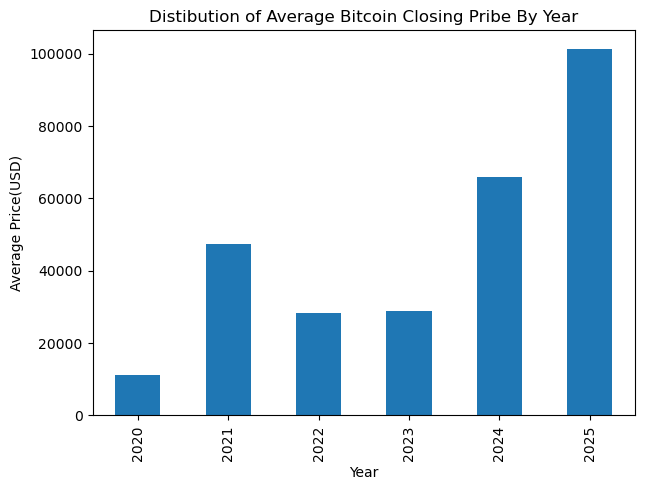

In [259]:
plt.figure(figsize=(7, 5))

btc.groupby('Year')['Close'].mean().plot(kind='bar')
plt.title('Distibution of Average Bitcoin Closing Pribe By Year')
plt.xlabel('Year')
plt.ylabel('Average Price(USD)')
plt.show()

In [265]:
import seaborn as sns

C:\Users\Pet3r\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


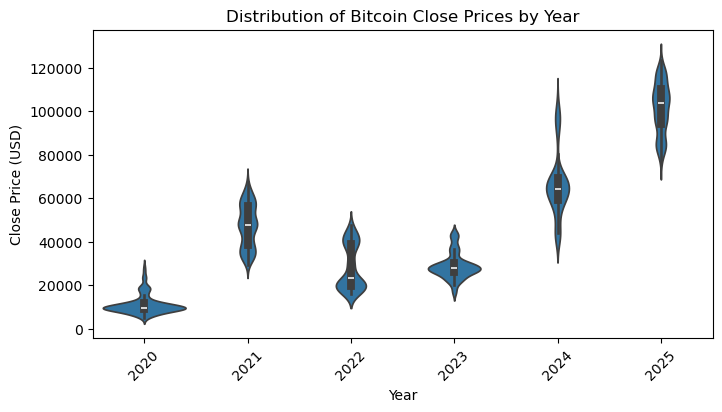

In [266]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=btc, x='Year', y='Close')
plt.title('Distribution of Bitcoin Close Prices by Year')
plt.ylabel('Close Price (USD)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

In [270]:
btc.describe()

,Date,Close,High,Low,Open,Volume,Year
count,2082,2082.000000,2082.000000,2082.000000,2082.000000,2.082000e+03,2082.000000
mean,2022-11-06 12:00:00,44293.233933,45137.882266,43314.835238,44242.996314,3.520496e+10,2022.367435
min,2020-01-01 00:00:00,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09,2020.000000
25%,2021-06-04 06:00:00,21162.654785,21539.722656,20692.972168,21148.722168,2.142795e+10,2021.000000
50%,2022-11-06 12:00:00,37813.939453,38961.474609,36805.923828,37788.771484,3.120932e+10,2022.000000
75%,2024-04-09 18:00:00,61308.390625,62564.499023,60110.679688,61261.770508,4.359095e+10,2024.000000
max,2025-09-12 00:00:00,123344.062500,124457.117188,118959.195312,123339.398438,3.509679e+11,2025.000000
std,NaN,29388.333697,29835.474811,28870.763832,29358.058252,2.064891e+10,1.650930


Text(0.5, 1.0, 'Distribution of Closing price Over Time')

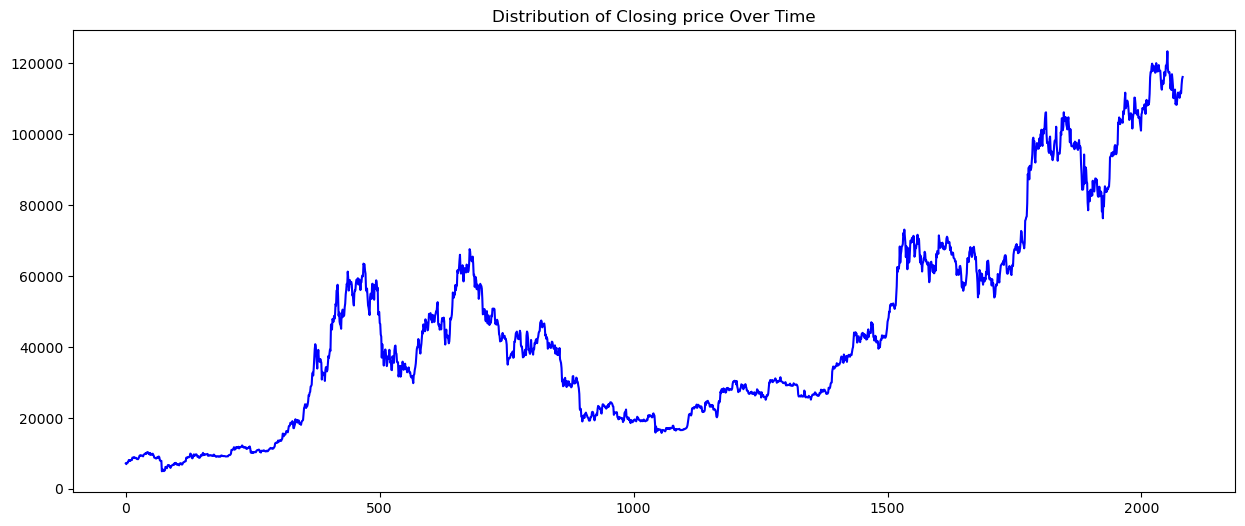

In [272]:
plt.figure(figsize=(15, 6))

plt.plot(btc['Close'], color='blue')
plt.title('Distribution of Closing price Over Time')

- I will be making date my index column

In [277]:
btc.set_index('Date', inplace=True)

In [279]:
btc.head()

,Close,High,Low,Open,Volume,Year
Date,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,2020
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,2020
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,2020
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,2020
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,2020


Plotting The Closing Price and Trade Volume Over Time

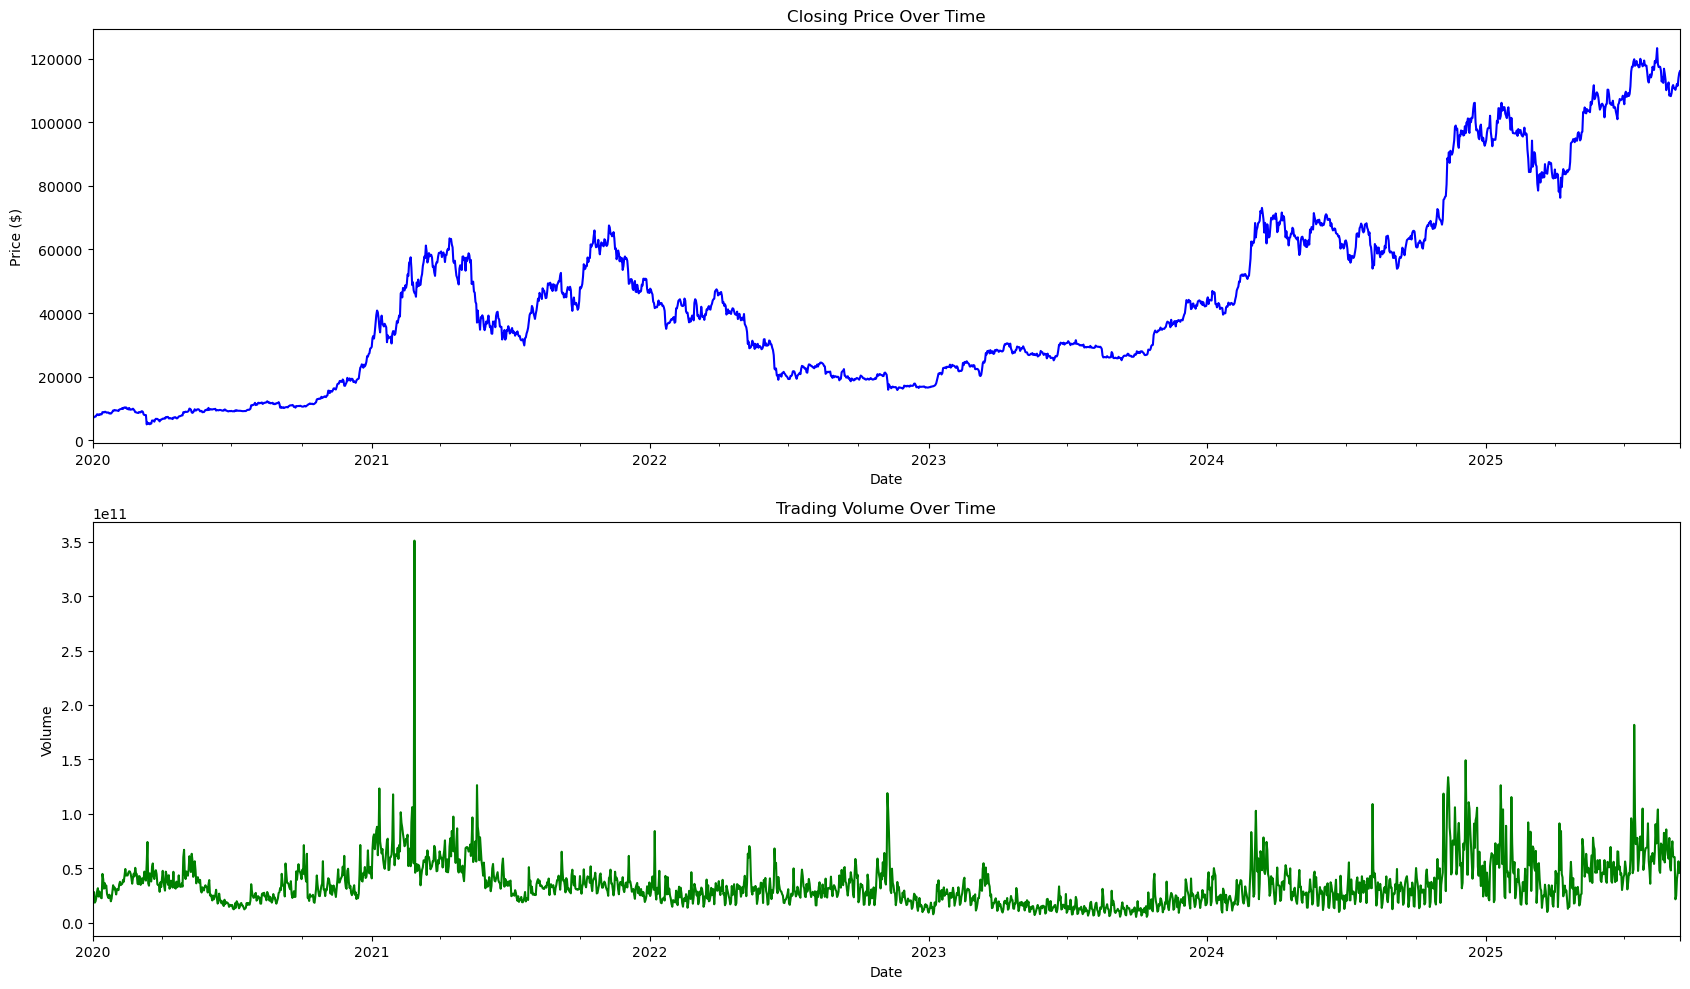

In [284]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(17, 10))

# Plot the closing price over time
btc['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price ($)')


# Plot the Trading volume over time
btc['Volume'].plot(ax=ax[1], color='green')
ax[1].set_title('Trading Volume Over Time')
ax[1].set_ylabel('Volume')


# Improve Layout
plt.tight_layout()
plt.show()

# Seasonality Analysis

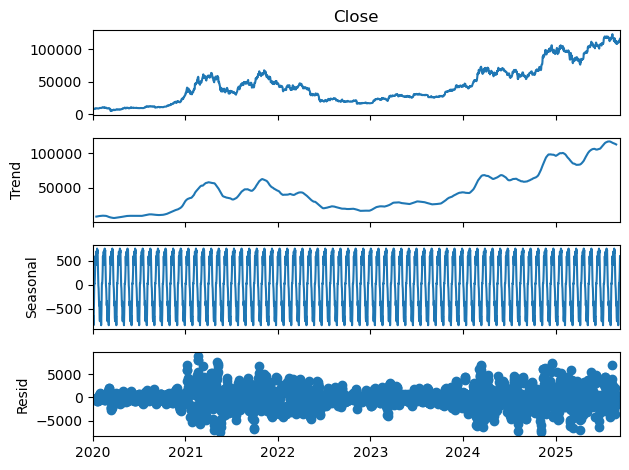

In [289]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(btc['Close'], model='Multiplicative', period=30)
fig = decomposition.plot()

plt.show()

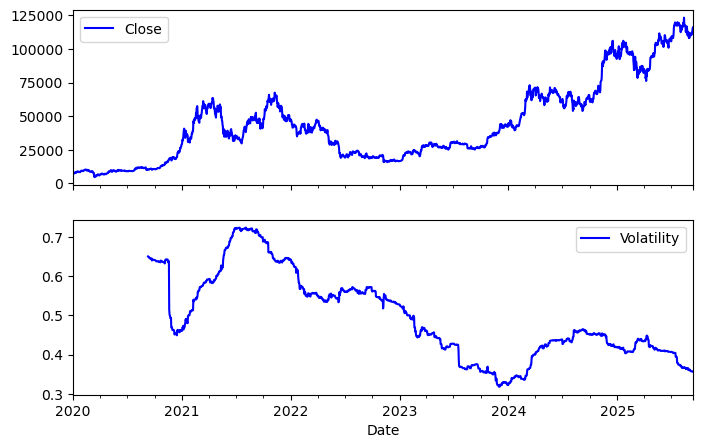

In [291]:
btc['Return']  = btc['Close'].pct_change()
btc['Volatility'] = btc['Return'].rolling(window=252).std() * np.sqrt(252)
btc[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 5))
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
- Volatility measures how much and how quickly the price of an asset (like Bitcoin) moves up and down over time. It's essentially a measure of risk or   uncertainty.
- High volatility = Large price swings = Higher risk
- Low volatility = Stable prices = Lower risk
- rolling(window=252): Looks at the last 252 trading days (approx 1 year)
- std(): Calculates standard deviation of those returns (how spread out they are)
- np.sqrt(252): Annualizes the volatility (scales daily volatility to yearly)
- Why 252?
- There are typically 252 trading days in a year (excluding weekends and holidays)
- This converts daily volatility to annualized volatility for easier comparison

-------------------------------------------------------------------------------------------------------------------------------------------------

- Return: Calculates the percentage change from one day to the next
- Example: If Bitcoin goes from $ 40,000 to $ 41,000, the return is (41000-40000)/40000 = 2.5%


--------------------------------------------------------------------------------------------------------------------------------------------------

- Key insights:
- When volatility spikes → Market is uncertain/nervous
- When volatility is low → Market is calm/confident
- High prices don't always mean high volatility (and vice versa) 

In [296]:
btc.head()

,Close,High,Low,Open,Volume,Year,Return,Volatility
Date,,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,2020,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,2020,-0.029819,NaN
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,2020,0.051452,NaN
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,2020,0.008955,NaN
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,2020,0.000089,NaN


In [298]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2082 entries, 2020-01-01 to 2025-09-12
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       2082 non-null   float64
 1   High        2082 non-null   float64
 2   Low         2082 non-null   float64
 3   Open        2082 non-null   float64
 4   Volume      2082 non-null   int64  
 5   Year        2082 non-null   int32  
 6   Return      2081 non-null   float64
 7   Volatility  1830 non-null   float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 138.3 KB


Plot Return

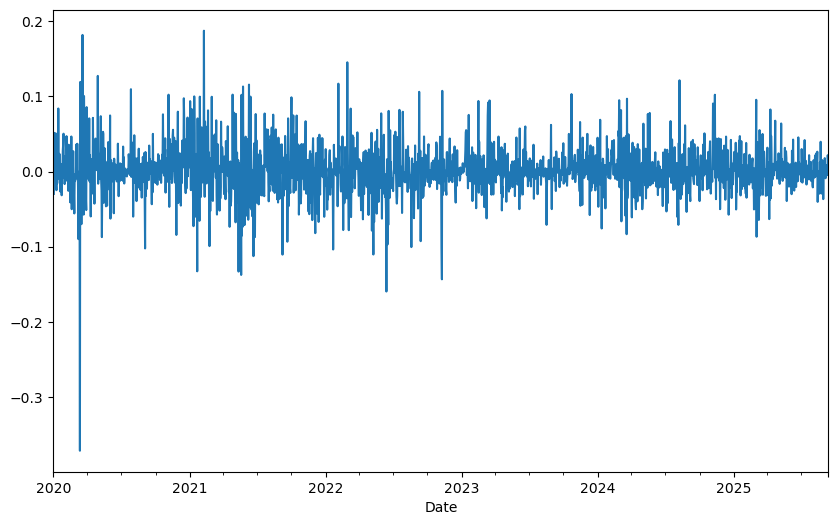

In [302]:
btc['Return'].plot(label='Return', figsize=(10,6))
plt.show()

- The returns plot shows daily percentage chages in Bitcoin's Price
- Positive spikes: Days when Bitcoin gaines Value
- Negative Spikes: days when Bitcoin lost Value
- Cluster around Zero (0): Relatively Flat days

## Preparing The Model

- Will be dividing my data into training and testing
- Then i will be predicting the future

In [311]:
btc.head(3)

,Close,High,Low,Open,Volume,Year,Return,Volatility
Date,,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,2020,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,2020,-0.029819,NaN
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,2020,0.051452,NaN


In [319]:
train = btc[btc['Year'] < 2025]

In [321]:
train.Year.value_counts()

Year
2020    366
2024    366
2021    365
2022    365
2023    365
Name: count, dtype: int64

In [323]:
test = btc[btc['Year'] == 2025]

In [325]:
len(test)

255

In [327]:
len(train)

1827

In [329]:
len(btc)

2082

In [331]:
prophet = train.reset_index()[['Date', 'Close']]

prophet.rename(columns={'Date':'ds', 'Close': 'y' }, inplace=True)

In [333]:
prophet.head()

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [335]:
len(prophet)

1827

In [337]:
prophet.tail()

,ds,y
1822,2024-12-27,94164.859375
1823,2024-12-28,95163.929688
1824,2024-12-29,93530.226562
1825,2024-12-30,92643.210938
1826,2024-12-31,93429.203125


## Calling the FB Prophet

In [340]:
from prophet import Prophet

model = Prophet(daily_seasonality=True)

model.fit(prophet)

10:57:13 - cmdstanpy - INFO - Chain [1] start processing
10:57:14 - cmdstanpy - INFO - Chain [1] done processing


This are the Parameters for frequency

'year': 'A'

'quarter': "Q"

'month': "M"

'day': 'D'

'hour': "H"

'minute': "T"

'second': "S"

'millisecond': 'L'

'microsecond': "U"

'nanosecond': "N"

The parameter tells the range of what we want to predict on e.g days, month, years, hours etc

periods: tells how many month, days , hours we want to predict on base on our data

In [343]:
future = model.make_future_dataframe(periods=254, freq = 'D')

In [345]:
forecast = model.predict(future)

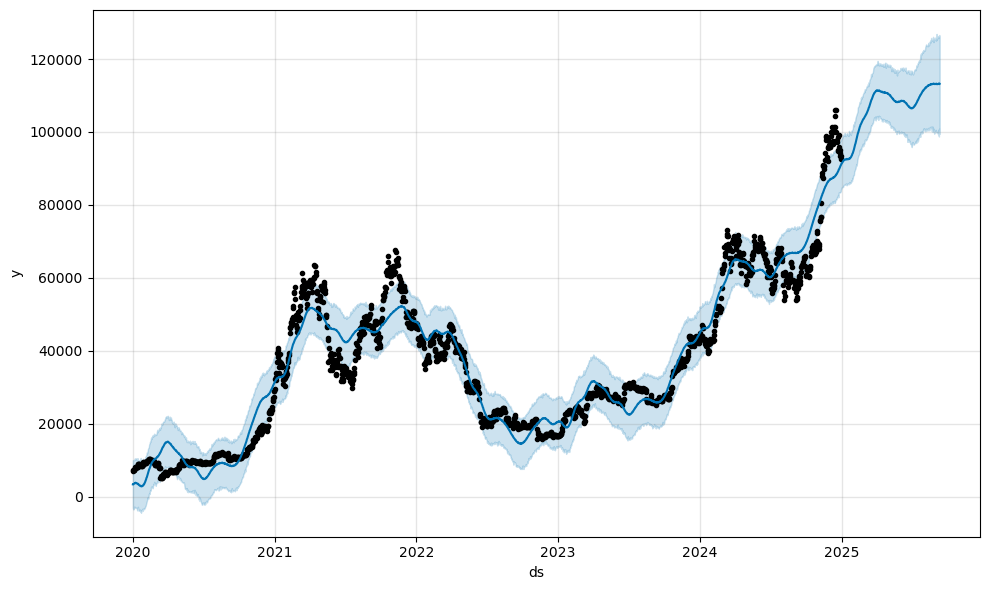

In [347]:
model.plot(forecast)
plt.show()

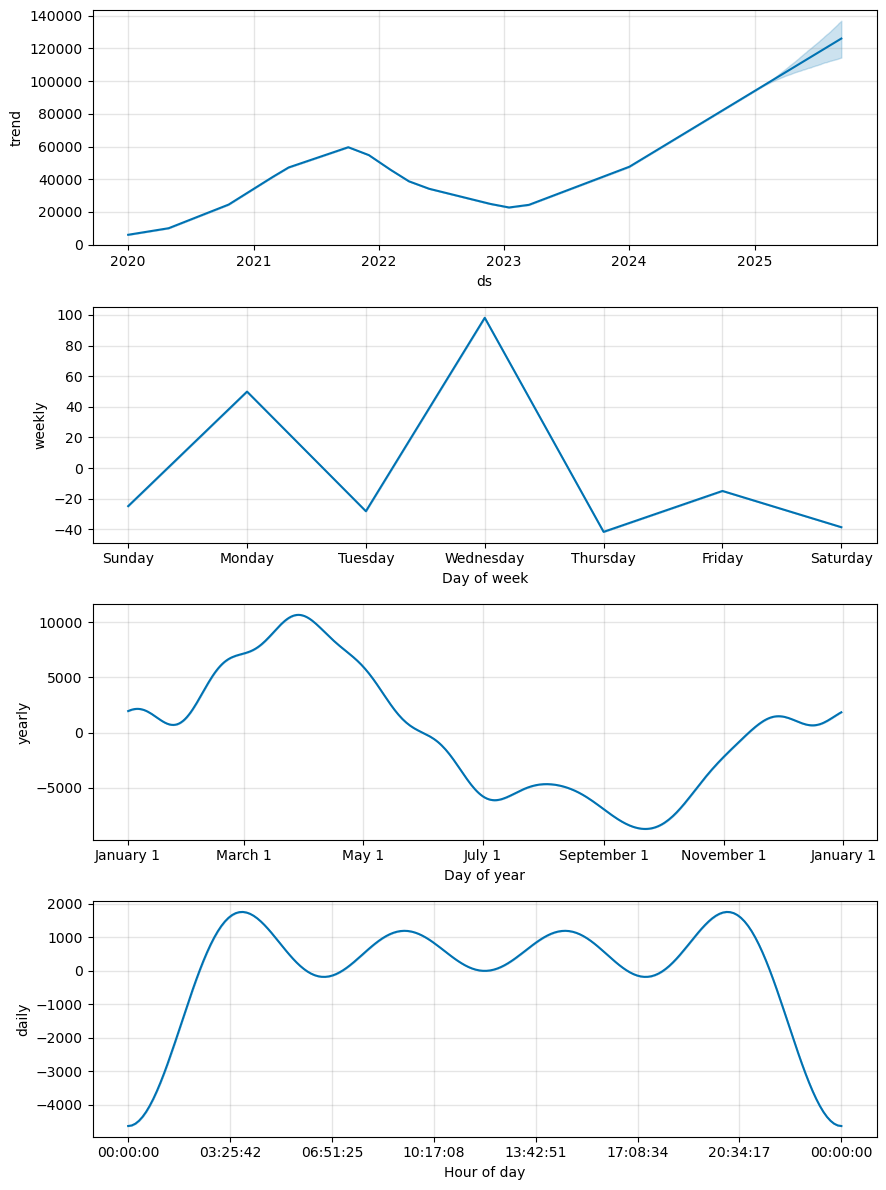

In [349]:
model.plot_components(forecast)
plt.show()

In [353]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2076,2025-09-07,125537.683187,99338.530116,126163.569847,114179.808530,136153.789800,-12398.619869,-12398.619869,-12398.619869,-4627.178297,...,-24.810738,-24.810738,-24.810738,-7746.630834,-7746.630834,-7746.630834,0.0,0.0,0.0,113139.063318
2077,2025-09-08,125664.551564,100673.748828,126361.542001,114253.168278,136337.913510,-12438.916250,-12438.916250,-12438.916250,-4627.178297,...,49.913719,49.913719,49.913719,-7861.651672,-7861.651672,-7861.651672,0.0,0.0,0.0,113225.635314
2078,2025-09-09,125791.419940,98749.707869,125866.028119,114307.700930,136547.289029,-12627.083153,-12627.083153,-12627.083153,-4627.178297,...,-28.137394,-28.137394,-28.137394,-7971.767461,-7971.767461,-7971.767461,0.0,0.0,0.0,113164.336787
2079,2025-09-10,125918.288317,100917.862904,126593.337275,114359.478696,136756.784118,-12605.524652,-12605.524652,-12605.524652,-4627.178297,...,98.085279,98.085279,98.085279,-8076.431634,-8076.431634,-8076.431634,0.0,0.0,0.0,113312.763664
2080,2025-09-11,126045.156693,99519.594307,125810.560491,114403.538865,136966.279207,-12843.897156,-12843.897156,-12843.897156,-4627.178297,...,-41.594424,-41.594424,-41.594424,-8175.124436,-8175.124436,-8175.124436,0.0,0.0,0.0,113201.259537


In [355]:
final_df = forecast[['yhat', 'yhat_upper', 'yhat_lower']]

In [357]:
import plotly.graph_objs as go
import plotly.offline as py


In [359]:

actual_chart = go.Scatter(y=btc['Close'], name='Actual')
predict_chart = go.Scatter(y=final_df['yhat'], name='Predicted')
predicted_upper = go.Scatter(y = final_df['yhat_upper'], name="Predicted Upper")
predicted_lower = go.Scatter(y = final_df['yhat_lower'], name='Predicted Lower')
py.plot([actual_chart, predict_chart, predicted_upper, predicted_lower], image_width=400, image_height = 400)

'temp-plot.html'

# Making a future Prediction from Sept to Dec 2025

Here i am taking the entire data to predict on the rest Sept to Dec 2025

In [367]:
pro_25 = btc.reset_index()[['Date', 'Close']]

In [369]:
pro_25.head()

,Date,Close
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [371]:
len(pro_25)

2082

In [373]:
pro_25.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Calling our model

In [377]:
model2 = Prophet(daily_seasonality = True)

model2.fit(pro_25)

10:57:52 - cmdstanpy - INFO - Chain [1] start processing
10:57:53 - cmdstanpy - INFO - Chain [1] done processing


In [379]:
future2 = model2.make_future_dataframe(periods=110, freq='D')

In [381]:
forecast2 = model2.predict(future2)

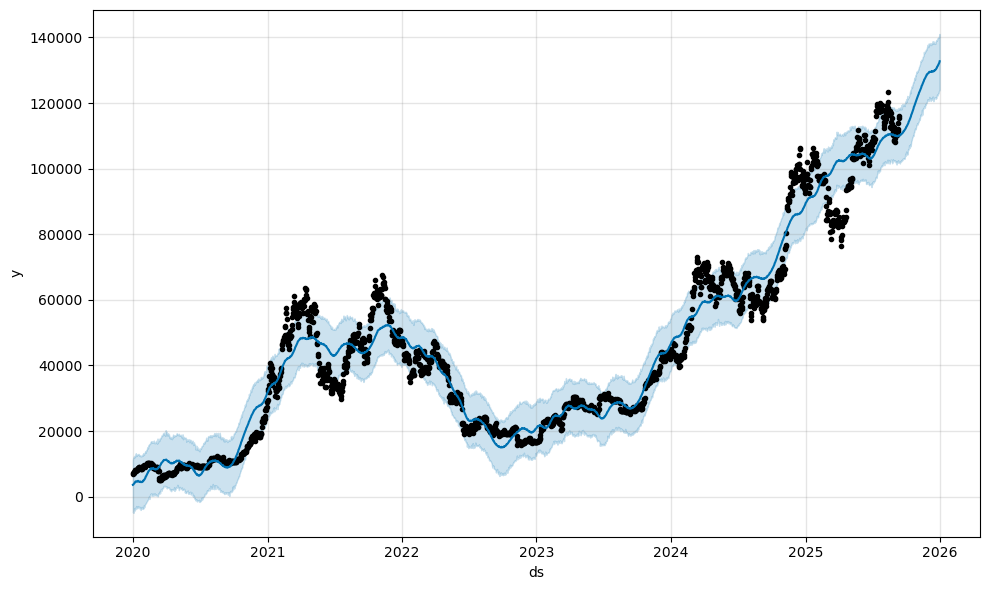

In [383]:
model2.plot(forecast2)
plt.show()

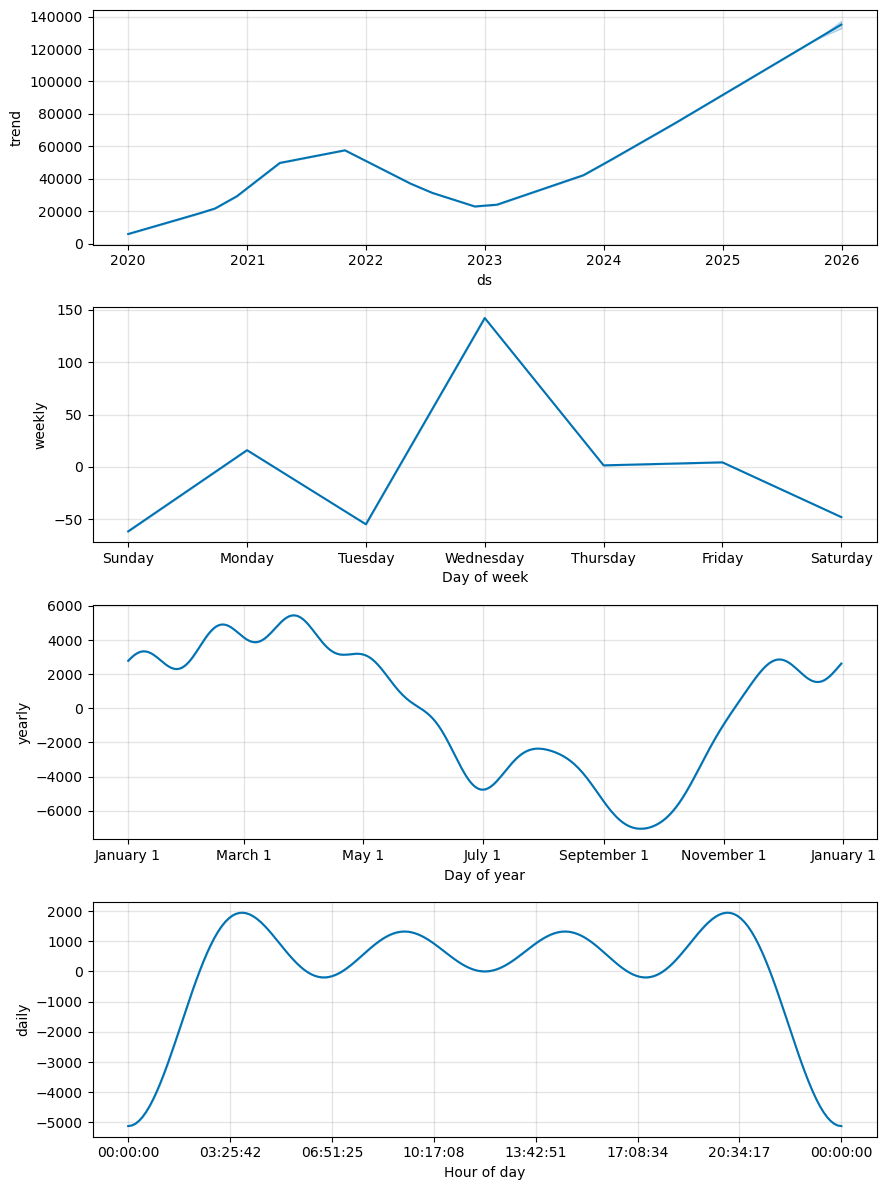

In [386]:
model2.plot_components(forecast2)
plt.show()

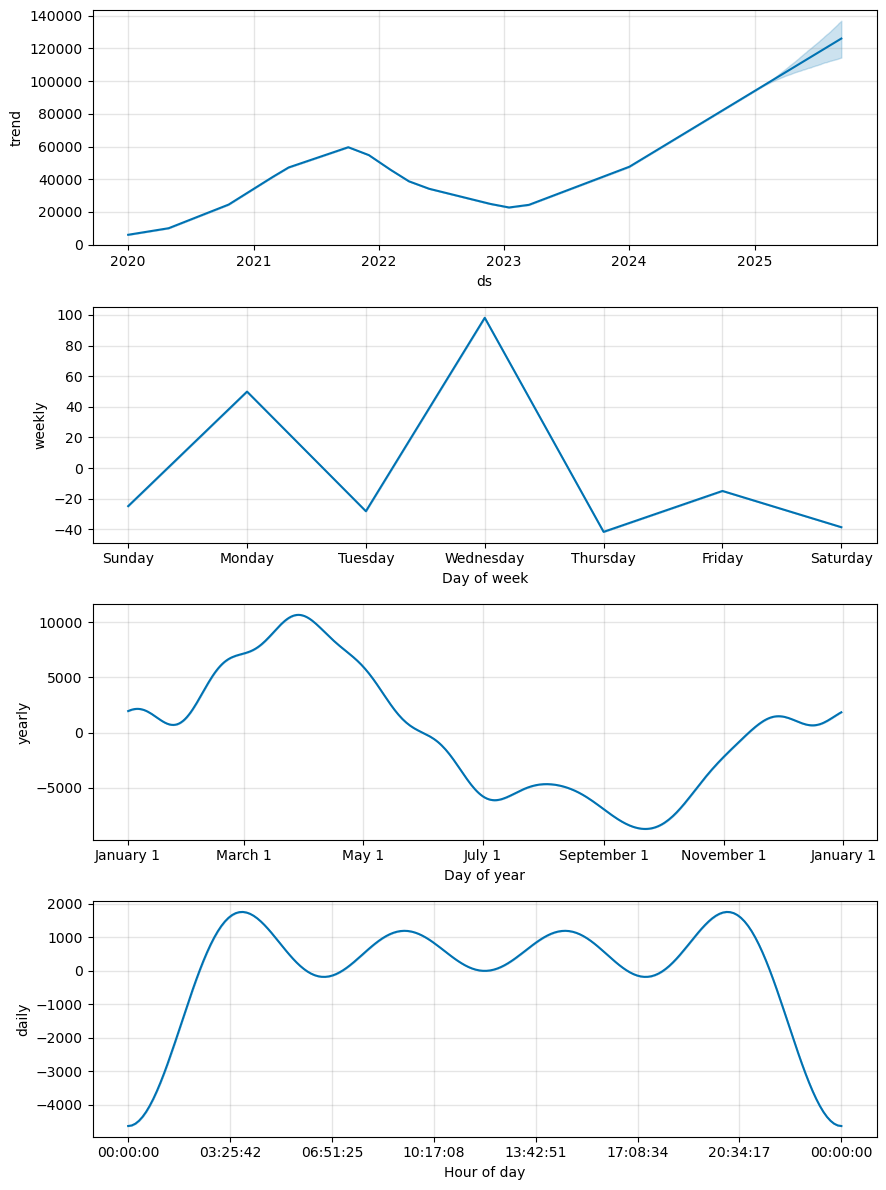

In [387]:
model.plot_components(forecast)
plt.show()

In [390]:
forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2187,2025-12-27,134611.387571,122940.007649,139981.465679,132378.478623,136914.811478,-3064.376369,-3064.376369,-3064.376369,-5118.877269,...,-47.825925,-47.825925,-47.825925,2102.326825,2102.326825,2102.326825,0.0,0.0,0.0,131547.011202
2188,2025-12-28,134730.515378,122951.664572,139960.395368,132441.534679,137054.155270,-2951.614247,-2951.614247,-2951.614247,-5118.877269,...,-61.458447,-61.458447,-61.458447,2228.721469,2228.721469,2228.721469,0.0,0.0,0.0,131778.901130
2189,2025-12-29,134849.643184,123683.834184,140060.127934,132535.559681,137208.934430,-2742.879746,-2742.879746,-2742.879746,-5118.877269,...,16.003598,16.003598,16.003598,2359.993925,2359.993925,2359.993925,0.0,0.0,0.0,132106.763438
2190,2025-12-30,134968.770990,123801.088698,141000.897852,132600.234861,137366.029746,-2680.343014,-2680.343014,-2680.343014,-5118.877269,...,-54.689590,-54.689590,-54.689590,2493.223845,2493.223845,2493.223845,0.0,0.0,0.0,132288.427976
2191,2025-12-31,135087.898796,124026.708409,141061.718507,132692.758826,137505.778186,-2351.377362,-2351.377362,-2351.377362,-5118.877269,...,142.071097,142.071097,142.071097,2625.428810,2625.428810,2625.428810,0.0,0.0,0.0,132736.521434


In [395]:
oct_dec = forecast2[forecast2['ds'] > '2025-09-12']

In [397]:
oct_dec = oct_dec[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [399]:
len(oct_dec)

110

In [401]:
final_plot = forecast2 [['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [403]:
len(final_plot)

2192

In [405]:

actual_chart = go.Scatter(y=btc['Close'], name='Actual')
predict_chart = go.Scatter(y=final_plot['yhat'], name='Predicted')
predicted_upper = go.Scatter(y = final_plot['yhat_upper'], name="Predicted Upper")
predicted_lower = go.Scatter(y = final_plot['yhat_lower'], name='Predicted Lower')
py.plot([actual_chart, predict_chart, predicted_upper, predicted_lower], image_width=400, image_height = 400)

'temp-plot.html'

Saving my predicted Sept-Dec forecast to a CSV

In [ ]:
oct_dec.to_csv('Bitcoin_forecast.csv', index=True)

In [407]:
btc_fut = pd.read_csv('Bitcoin_forecast.csv')

In [409]:
btc_fut

,Unnamed: 0,ds,yhat,yhat_lower,yhat_upper
0,2082,2025-09-13,109980.292688,102054.870760,117664.389800
1,2083,2025-09-14,110033.042791,101714.592141,118412.117138
2,2084,2025-09-15,110186.790409,102260.751901,118756.283047
3,2085,2025-09-16,110202.659516,102934.945075,118260.989898
4,2086,2025-09-17,110495.165769,102896.838699,118347.951319
...,...,...,...,...,...
104,2186,2025-12-26,131379.331257,122843.556281,139933.872469
105,2187,2025-12-27,131583.787051,123200.929511,139490.595976
106,2188,2025-12-28,131814.062147,122877.764306,140519.635688
107,2189,2025-12-29,132139.967646,123931.709095,140911.893290
